<a href="https://colab.research.google.com/github/AjmiyaSalim/breast-cancer-knn-svm/blob/main/Breast_Cancer_KNN_%26_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Introduction

This notebook focuses on the **comparative analysis of two popular machine learning classification algorithms: Support Vector Machine (SVM) and K-Nearest Neighbors (KNN)**, using the **Breast Cancer Wisconsin Diagnostic Dataset**. The dataset consists of various real-valued features computed from digitized images of fine needle aspirates (FNA) of breast masses, with each instance labeled as either **malignant (M)** or **benign (B)**.

###  Why SVM and KNN?

- **Support Vector Machine (SVM)** is a supervised learning model that finds the optimal hyperplane to separate data into classes. It performs well in high-dimensional spaces and is effective for classification tasks where there is a clear margin of separation.
  
- **K-Nearest Neighbors (KNN)** is a simple yet powerful non-parametric algorithm that classifies a data point based on the majority label of its nearest neighbors. It does not require training but can be computationally expensive during prediction.

###  Why Compare SVM and KNN?

Although both algorithms are used for classification, they differ in several aspects:
- **Learning Approach**: SVM is model-based (global), while KNN is instance-based (local).
- **Sensitivity**: KNN is more sensitive to noise and irrelevant features.
- **Computational Cost**: SVM requires more training time, KNN requires more prediction time.
- **Performance**: Varies depending on data distribution and hyperparameters.

###  Objective / Need for Choosing the Dataset

The **Breast Cancer Wisconsin Diagnostic Dataset** is widely used for benchmarking classification models due to its:
- **Real-world medical relevance** in detecting and diagnosing breast cancer,
- **Clean and well-labeled data** with informative features such as radius, texture, and symmetry of cell nuclei,
- **Balanced classification problem** with two clearly defined categories (malignant and benign),
- Suitability for testing both **linear (SVM)** and **non-linear (KNN)** classifiers.

By applying both algorithms on this dataset, we aim to assess their effectiveness in a **critical healthcare application**, making this comparison both practically important and scientifically meaningful.


In [ ]:
import pandas as pd
data=pd.read_csv('/content/KNNAlgorithmDataset.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
data.drop(['id'],axis=1,inplace=True)

In [ ]:
data.drop(['Unnamed: 32'],axis=1,inplace=True)

In [ ]:
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


##  Visualizing Feature Relationships by Diagnosis

To better understand the distribution of data and identify possible separation between the two classes (**Malignant** and **Benign**), we use **scatter plots** to visualize relationships between key pairs of features.

###  What This Code Does:

- The dataset is first split into two subsets:
  - `malignant`: rows where the diagnosis is **'M'**
  - `benign`: rows where the diagnosis is **'B'**

- Then, four meaningful **feature pairs** are selected to explore relationships:
  1. `radius_mean` vs `texture_mean`
  2. `area_mean` vs `concavity_mean`
  3. `perimeter_worst` vs `smoothness_worst`
  4. `symmetry_mean` vs `fractal_dimension_mean`

- For each pair, a **scatter plot** is created:
  - **Red points** represent **Malignant** samples.
  - **Green points** represent **Benign** samples.
  - The plots include labels, legends, and grids for clarity.

###  Why This Is Important:

- **Visual separation** between the two classes can help determine which features may be more effective for classification.
- Provides insights into which features might contribute most to the predictive power of models like **SVM** and **KNN**.
- Helps detect overlapping data regions and outliers.

By visualizing these relationships, we can **intuitively evaluate feature separability**, guiding our expectations and feature selection for model training.
###  Observations from the Graphs

From the scatter plots, we observe that **Malignant and Benign tumors tend to form distinguishable clusters** for several feature pairs. Specifically, features like `area_mean`, `concavity_mean`, and `perimeter_worst` show **clear separation** between the two classes, indicating that these features are potentially strong indicators for classification. However, some overlap still exists, suggesting the need for robust classifiers like SVM and KNN to handle borderline cases effectively.


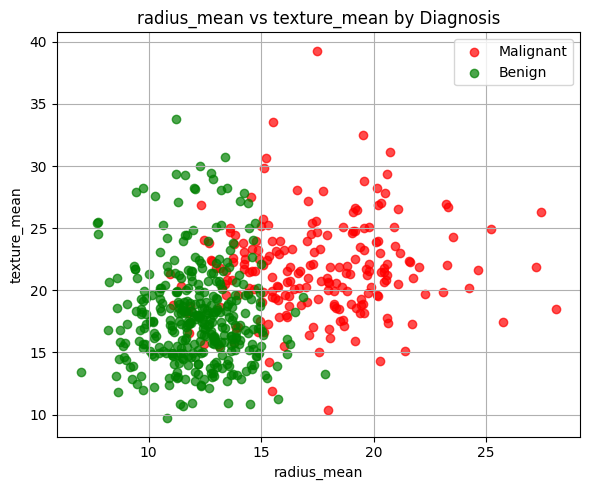

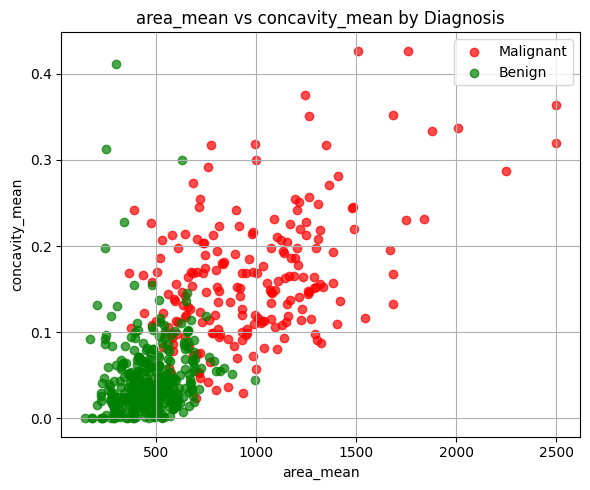

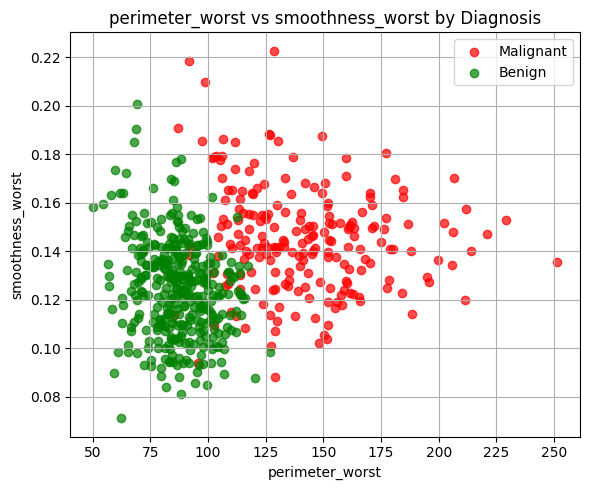

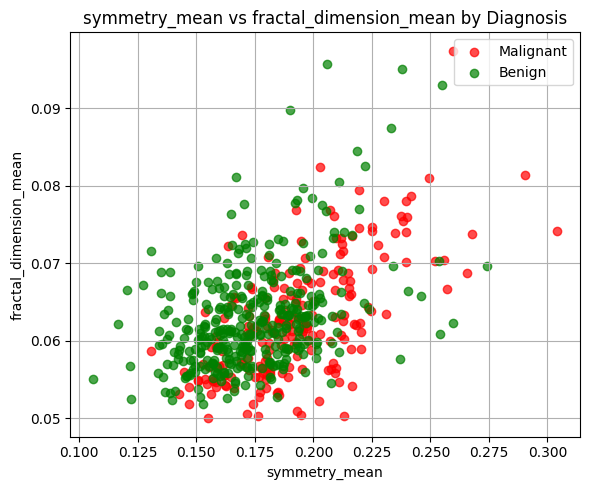

In [ ]:
import matplotlib.pyplot as plt

malignant = data[data['diagnosis'] == 'M']
benign = data[data['diagnosis'] == 'B']

feature_pairs = [
    ('radius_mean', 'texture_mean'),
    ('area_mean', 'concavity_mean'),
    ('perimeter_worst', 'smoothness_worst'),
    ('symmetry_mean', 'fractal_dimension_mean')
]

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(6, 5))
    plt.scatter(malignant[x_feature], malignant[y_feature], color='red', label='Malignant', alpha=0.7)
    plt.scatter(benign[x_feature], benign[y_feature], color='green', label='Benign', alpha=0.7)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{x_feature} vs {y_feature} by Diagnosis")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##  Mapping Diagnosis Labels to Numeric Values

In the original dataset, the `diagnosis` column contains **categorical string values**:
- `'M'` for **Malignant**
- `'B'` for **Benign**

###  Why Mapping Is Needed

Most machine learning models, including **SVM** and **KNN**, **require numerical input** to perform mathematical operations. Categorical string values like `'M'` and `'B'` cannot be directly processed.

To resolve this, we use **label mapping**:
- `'M'` is mapped to `0`
- `'B'` is mapped to `1`

This allows the algorithms to:
- Interpret the target labels numerically,
- Calculate distances (in KNN) or margins (in SVM),
- Treat the problem as a **binary classification** task (0 vs. 1).

### Alternative: Label Encoding
Instead of manual mapping, we can also use LabelEncoder from sklearn.preprocessing.


In [ ]:
diagnosis_={
    'M':0,
    'B':1
}
data['diagnosis']=data['diagnosis'].map(diagnosis_)

In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
1,357
0,212


In [ ]:
for column in data.columns:
  print(data[column].value_counts())

diagnosis
1    357
0    212
Name: count, dtype: int64
radius_mean
12.340    4
11.060    3
10.260    3
12.770    3
13.050    3
         ..
19.810    1
13.540    1
13.080    1
9.504     1
15.340    1
Name: count, Length: 456, dtype: int64
texture_mean
16.84    3
19.83    3
15.70    3
20.52    3
18.22    3
        ..
27.88    1
22.68    1
23.93    1
29.37    1
30.62    1
Name: count, Length: 479, dtype: int64
perimeter_mean
82.61     3
134.70    3
87.76     3
113.40    2
120.20    2
         ..
82.53     1
100.40    1
81.15     1
60.73     1
87.02     1
Name: count, Length: 522, dtype: int64
area_mean
512.2     3
321.6     2
582.7     2
1138.0    2
477.3     2
         ..
1148.0    1
642.7     1
461.0     1
951.6     1
477.4     1
Name: count, Length: 539, dtype: int64
smoothness_mean
0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630    3
          ..
0.08523    1
0.07371    1
0.12000    1
0.07941    1
0.08871    1
Name: count, Length: 474, dtype: int64
compactness_mean
0.11470 

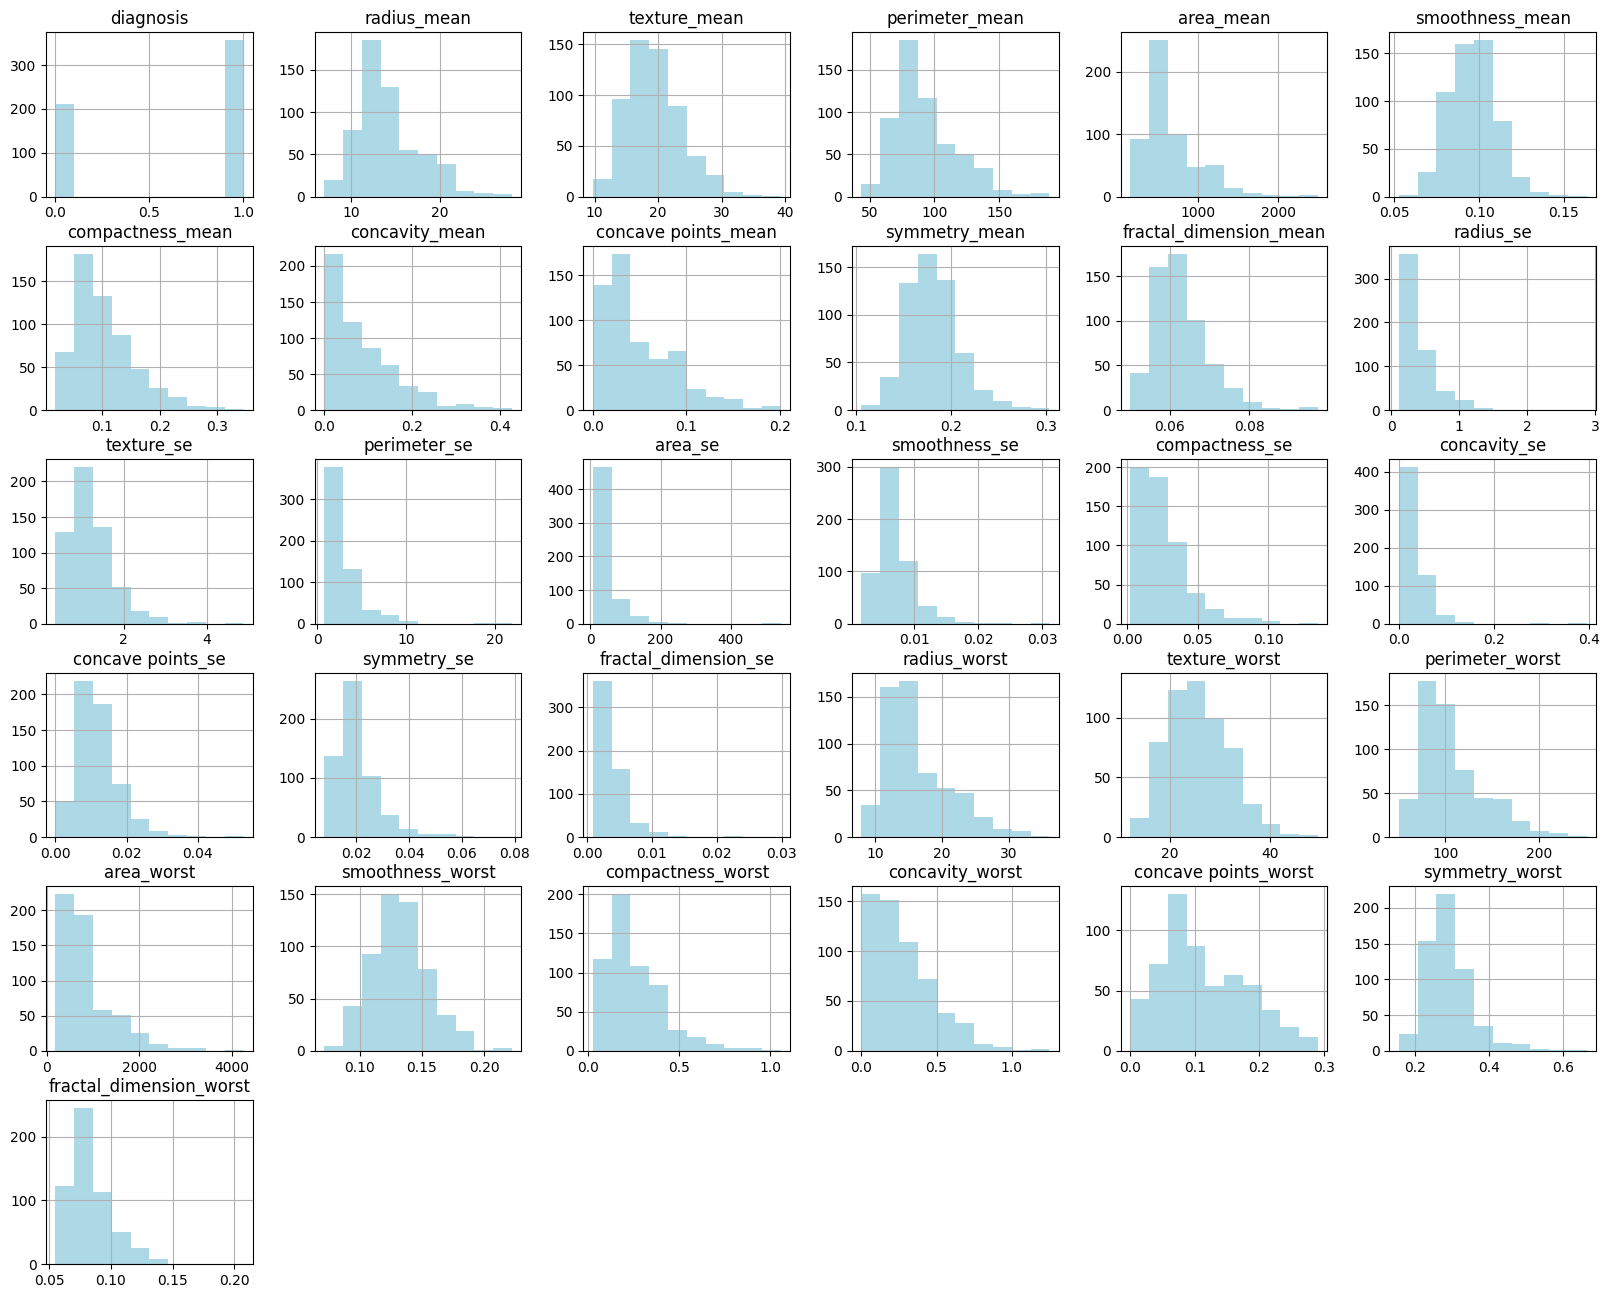

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(20,16),color='lightblue')
plt.show()

In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X=data.iloc[:,1:32].values
y=data.iloc[:,0].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_test.shape

(114,)

KNeighborsClassifier(n_neighbors=3)
96.49122807017544
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[41  2]
 [ 2 69]]
SVC()
97.36842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  2]
 [ 1 70]]


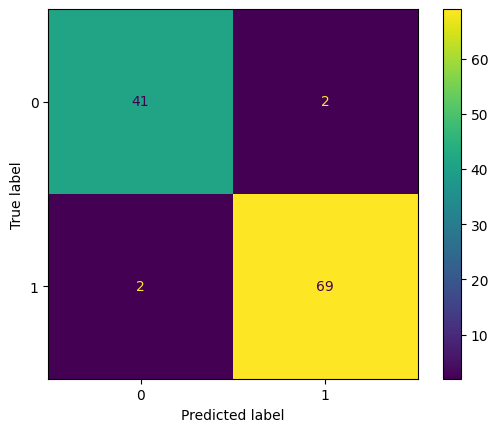

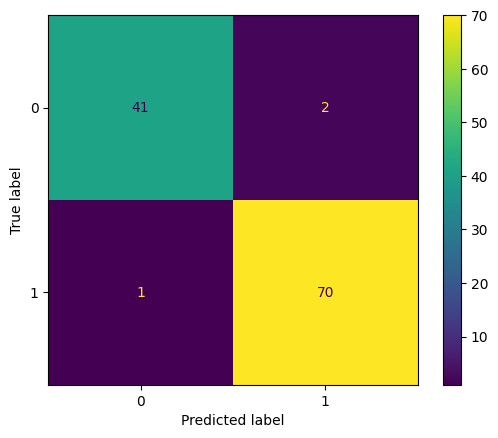

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

knn=KNeighborsClassifier(n_neighbors=3)
svm=SVC()

l=[knn,svm]

for i in l:
  i.fit(X_train,y_train)
  y_predict=i.predict(X_test)
  print(i)
  print(accuracy_score(y_test,y_predict)*100)
  print(classification_report(y_test,y_predict))
  print(confusion_matrix(y_test,y_predict))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))


##  Conclusion

Based on the performance metrics obtained from both models:

- **K-Nearest Neighbors (k=3)** achieved an accuracy of **96.49%**, with a balanced precision and recall for both classes. It misclassified **4 samples** (2 from each class).
- **Support Vector Machine (SVM)** slightly outperformed KNN with an accuracy of **97.37%**, showing higher recall for the benign class and fewer misclassifications (**only 3 samples misclassified**).

###  Key Takeaways:
- **SVM performed marginally better** in terms of accuracy, precision, recall, and F1-score.
- Both models show strong classification capabilities, but **SVM demonstrated more reliable performance**, particularly in correctly identifying benign cases with a **recall of 0.99**.
- Considering both accuracy and confusion matrix, **SVM is the more suitable choice** for this binary classification task on the breast cancer dataset.


While both algorithms perform well, **SVM shows a slight but consistent advantage** over KNN in this scenario, making it the preferred model for this classification problem.
